#                                          PROJECT : Gender Recognition by voice

In [1]:
#some necessary imports
import pandas as pd

In [2]:
import numpy as np

In [3]:
#importing the dataset
dataset=pd.read_csv('voice.csv')

In [4]:
dataset.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
#to check the columns of the dataset
dataset.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [6]:
#to check the shape of the dataset
dataset.shape

(3168, 21)

In [7]:
#to check the datatype
dataset.dtypes


meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [8]:
#before processing with any operation we need to check whether there is any missing value in the dataset or not.
dataset.isnull().values.any()

False

# Exploratory Data Analysis:
To check out some of the stats with some plots and the built-in methods in pandas!

In [9]:
dataset.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

# Data Visualization

In [11]:
#for visualization lets import the following:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#with this the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline

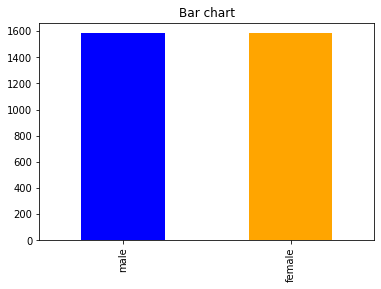

In [13]:
#distribution of target variables
count_Class=pd.value_counts(dataset["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

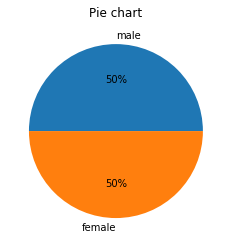

In [14]:
#use pie chart for visualization of the distribution of target variable
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()


In [15]:
x = dataset.iloc[:,0:20]  #independent columns
y = dataset.iloc[:,-1] #target column i.e the sex

In [16]:
#since the target variable is given in text format we need to encode it..because in ML we deal with only numerical values.
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(y)


# Train/Test Split
** Splitting the data into a training set and a testing set.**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=10)


# Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
x_scaler=StandardScaler()
x_train=x_scaler.fit_transform(x_train)
x_test=x_scaler.transform(x_test)


# Train a Model
Now its time to train a Support Vector Machine Classifier.

Call the SVC() model from sklearn and fit the model to the training data.

In [20]:

from sklearn import svm

In [21]:
model=svm.SVC()

model.fit(x_train,y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Model Evaluation
Now get predictions from the model and create an accuracy score, confusion matrix and a classification report.

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
print(accuracy_score(y_test,y_pred))

0.9852786540483701


In [25]:
print(confusion_matrix(y_test,y_pred))

[[450   6]
 [  8 487]]


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       456
           1       0.99      0.98      0.99       495

    accuracy                           0.99       951
   macro avg       0.99      0.99      0.99       951
weighted avg       0.99      0.99      0.99       951



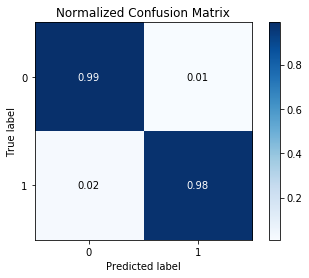

In [27]:
#visualization of the confusion matrix
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)
plt.show()

We have noticed that our model was pretty good!But let's now tune the features to try to get even better.So basically now we will use one of the feature selection procedure to extract some of the most important feature and check if by removing some less important feature(according to the adopted selection process) can increase our accuracy or not. But remember we are just doing trial and error ..So if by reducing the dimension our model improves we will go with this model else the previous one.

In [28]:
#using scikit learn for feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
importances = model.feature_importances_

In [29]:
print(importances)



[0.02001882 0.10537172 0.02217999 0.14020899 0.02197156 0.19219224
 0.01691911 0.01194624 0.05468081 0.03063997 0.03307993 0.02765305
 0.23316364 0.01429146 0.01129157 0.01434974 0.01122451 0.01671743
 0.01295736 0.00914184]


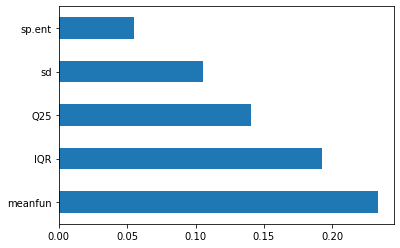

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
#now choosing to take the top 5 import features and removing the rest from our model
col=["modindex",'Q75','skew','maxfun','mode','meanfreq','minfun','centroid','kurt','modindx','median','sfm','meandom','mindom','maxdom','dfrange']
select=[x for x in dataset.columns if x not in col]
new_dataset=dataset.loc[:,select]

In [32]:
new_dataset

,sd,Q25,IQR,sp.ent,meanfun,label
0,0.064241,0.015071,0.075122,0.893369,0.084279,male
1,0.067310,0.019414,0.073252,0.892193,0.107937,male
2,0.083829,0.008701,0.123207,0.846389,0.098706,male
3,0.072111,0.096582,0.111374,0.963322,0.088965,male
4,0.079146,0.078720,0.127325,0.971955,0.106398,male
...,...,...,...,...,...,...
3163,0.084734,0.049285,0.151859,0.962934,0.182790,female
3164,0.089221,0.042718,0.162193,0.960716,0.188980,female
3165,0.095798,0.033424,0.190936,0.946854,0.209918,female
3166,0.090628,0.043508,0.176435,0.950436,0.172375,female


In [33]:
x=new_dataset.iloc[:,:-1].values
y=new_dataset.iloc[:,-1].values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

In [35]:
from sklearn.preprocessing import StandardScaler
x_train=x_scaler.fit_transform(x_train)
x_test=x_scaler.transform(x_test)

In [36]:
model=svm.SVC()
model.fit(x_train,y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = model.predict(x_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [39]:
print(accuracy_score(y_test,y_pred))

0.9831756046267087


In [40]:
print(confusion_matrix(y_test,y_pred))

[[447   9]
 [  7 488]]


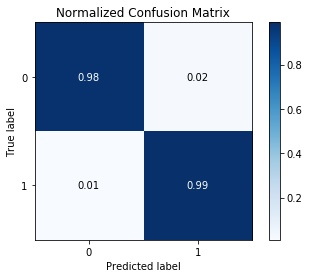

In [41]:
#visualization of the confusion matrix
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)
plt.show()

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       456
           1       0.98      0.99      0.98       495

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



So we see rather than increasing the accuracy and the precision it had decreased the efficiency of our model..so we 
we will go with the earlier model.